In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [35]:
IMAGE_SIZE = 256
BACTH_SIZE = 32
channel = 3
EPOCHS = 50

In [5]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BACTH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = datasets.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
# mengetahui panjang dari dataset
len(datasets)

68

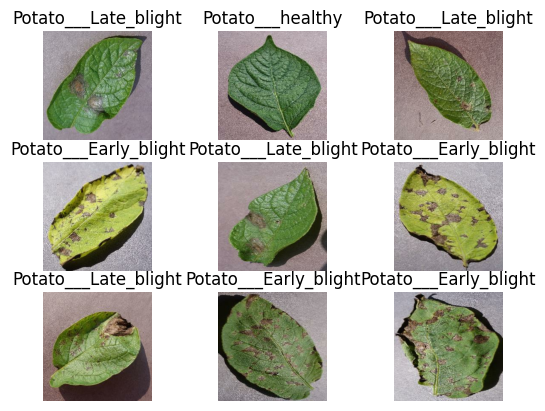

In [14]:
for image_batch, labels_batch in datasets.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [ ]:
# 80% ==> training
# 20% ==> 10% validation, 10% testing

In [15]:
# Pembagian dataset
train_size = 0.8
len(datasets) * train_size

54.400000000000006

In [16]:
train_ds = datasets.take(54)
len(train_ds)


54

In [17]:
test_ds = datasets.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(datasets) * val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(datasets, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1

    if shuffle:
        datasets = datasets.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * len(datasets))
    val_size = int(val_split * len(datasets))

    train_ds = datasets.take(train_size)
    val_ds = datasets.skip(train_size).take(val_size)
    test_ds = datasets.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [25]:
datasets, val_ds, test_ds = get_dataset_partitions_tf(datasets)

In [26]:
len(datasets), len(val_ds), len(test_ds)

(43, 5, 6)

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [31]:
# data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
input_shape = (BACTH_SIZE, IMAGE_SIZE, IMAGE_SIZE, channel)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, channel)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BACTH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50



c:\Users\dhima\miniconda3\envs\chatbot_notebook\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



54/54 [==============================] - 74s 1s/step - loss: 0.8751 - accuracy: 0.5168 - val_loss: 0.7269 - val_accuracy: 0.6875
Epoch 2/50
54/54 [==============================] - 55s 1s/step - loss: 0.6052 - accuracy: 0.7228 - val_loss: 0.4287 - val_accuracy: 0.8188
Epoch 3/50
54/54 [==============================] - 62s 1s/step - loss: 0.3109 - accuracy: 0.8848 - val_loss: 0.1476 - val_accuracy: 0.9500
Epoch 4/50
54/54 [==============================] - 55s 1s/step - loss: 0.2307 - accuracy: 0.9080 - val_loss: 0.2262 - val_accuracy: 0.8875
Epoch 5/50
54/54 [==============================] - 55s 1s/step - loss: 0.1690 - accuracy: 0.9306 - val_loss: 0.1353 - val_accuracy: 0.9500
Epoch 6/50
54/54 [==============================] - 48s 898ms/step - loss: 0.1499 - accuracy: 0.9410 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 7/50
54/54 [==============================] - 49s 916ms/step - loss: 0.1698 - accuracy: 0.9323 - val_loss: 0.1719 - val_accuracy: 0.9187
Epoch 8/50
54/54 [======

In [40]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 3s 194ms/step - loss: 0.0667 - accuracy: 0.9881


In [41]:
scores


[0.06666235625743866, 0.988095223903656]

In [42]:
history

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


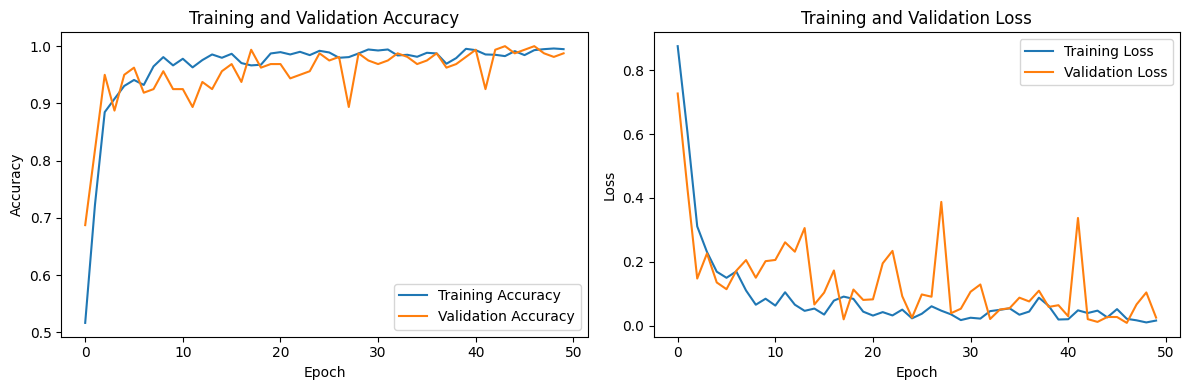

<Figure size 1500x500 with 0 Axes>

In [51]:
from matplotlib import animation
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()
# Create animation
epochs_range = range(EPOCHS)
fig = plt.figure(figsize=(15, 5))

first image to predict:  2
first image label:  Potato___healthy
1/1 [==============================] - 0s 70ms/step
model prediction:  Potato___healthy


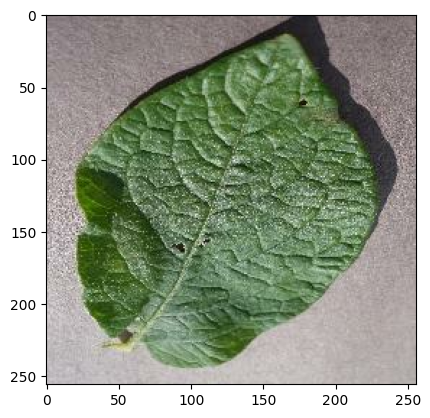

In [61]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    print("first image to predict: ", first_label.numpy())
    plt.imshow(first_image)
    print("first image label: ", class_names[first_label])
    
    model_prediction = model.predict(images_batch) 
    print("model prediction: ", class_names[model_prediction[0].argmax()])
    

In [60]:
import numpy as np
np.argmax(model_prediction[0])

2

In [67]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


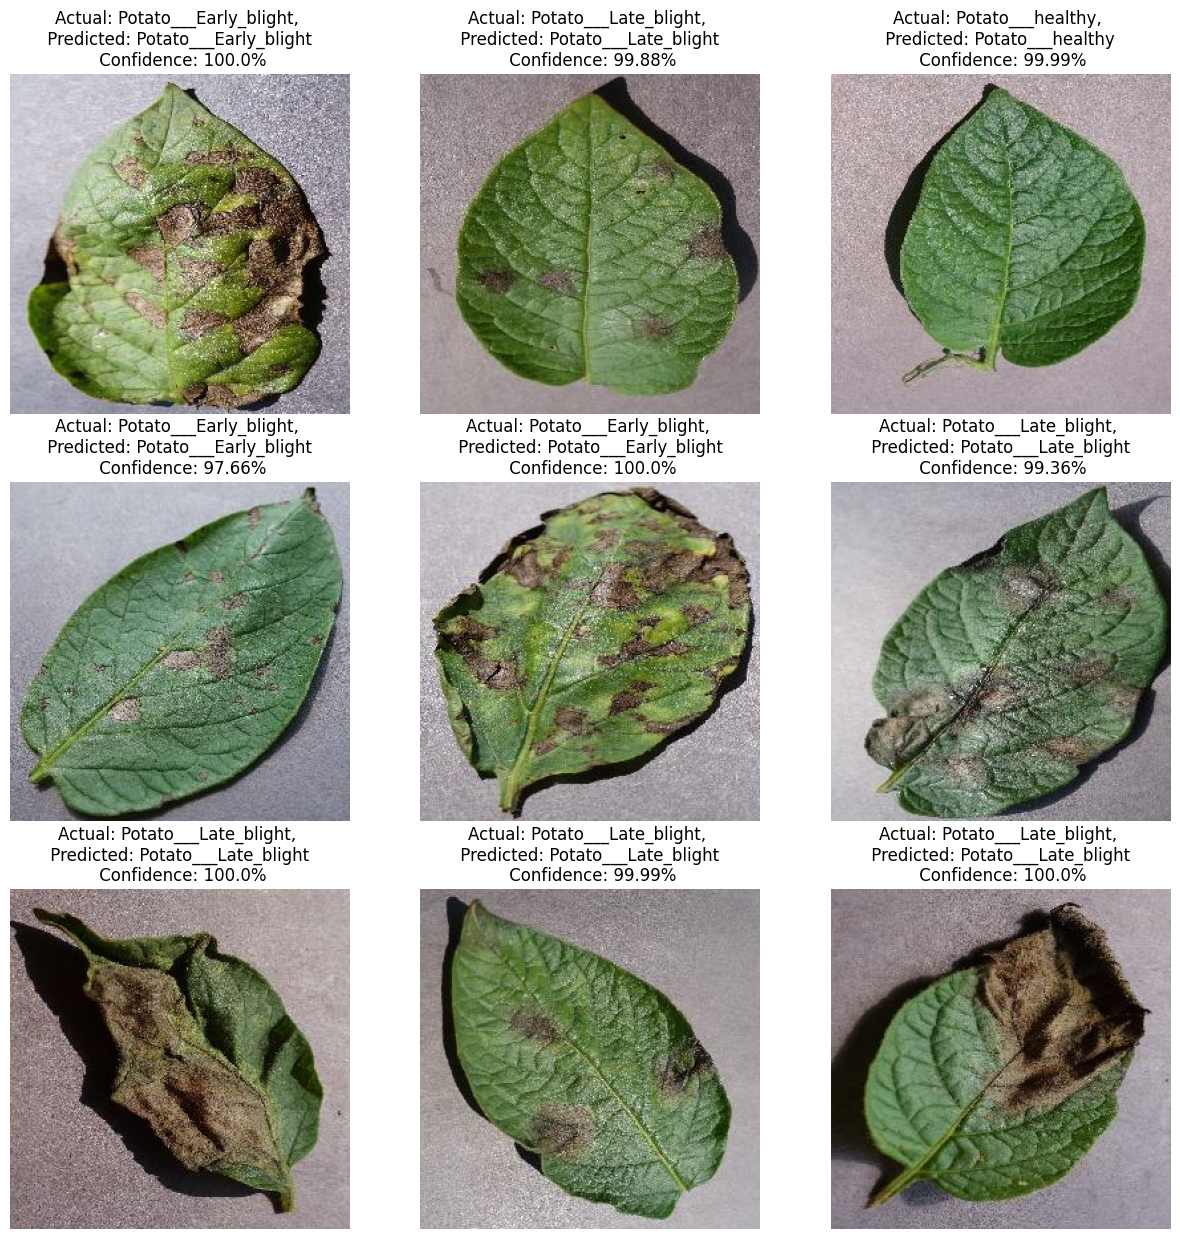

In [73]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        actual_label = class_names[labels[i]]
        predicted_class, confidence = predict(model, images[i])
        plt.title(f"Actual: {actual_label}, \n Predicted: {predicted_class} \n Confidence: {confidence}%")

In [79]:
model_version = 1

model.save(f'models/{model_version}.keras')

In [80]:
model.save("models/model.h5", save_format="h5")

In [81]:
model.save("models/saved_model_format", save_format="tf")

INFO:tensorflow:Assets written to: models/saved_model_format\assets


INFO:tensorflow:Assets written to: models/saved_model_format\assets


In [82]:
model.save("models/modell.h5", include_optimizer=False)

c:\Users\dhima\miniconda3\envs\chatbot_notebook\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
